In [2]:
from google.colab import files

# Upload your CSV file from your local machine
uploaded = files.upload()
import pandas as pd




Saving benin-malanville.csv to benin-malanville.csv


In [4]:
import pandas as pd

# Load the CSV (make sure the file name matches exactly)
df = pd.read_csv("benin-malanville.csv")

# Check first few rows
df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [5]:
# Basic info
df.info()

# Summary statistics
df.describe()

# Missing values
missing_report = df.isna().sum()
missing_report = missing_report[missing_report > 0]  # Show only columns with missing values
missing_report


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

,0
Comments,525600


In [6]:
from scipy.stats import zscore
import numpy as np

# Select columns for outlier check
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Compute Z-scores
z_scores = df[cols_to_check].apply(zscore)

# Find where absolute Z-score > 3
outliers = (np.abs(z_scores) > 3)

# Count of outliers per column
outliers.sum()


,0
GHI,89
DNI,0
DHI,3738
ModA,27
ModB,63
WS,3109
WSgust,3500


In [8]:
# Replace outliers with the median of each column
for col in cols_to_check:
    median = df[col].median()
    df.loc[outliers[col], col] = median


In [10]:
import os
os.makedirs('data', exist_ok=True)


In [11]:
df.to_csv('data/benin_clean.csv', index=False)


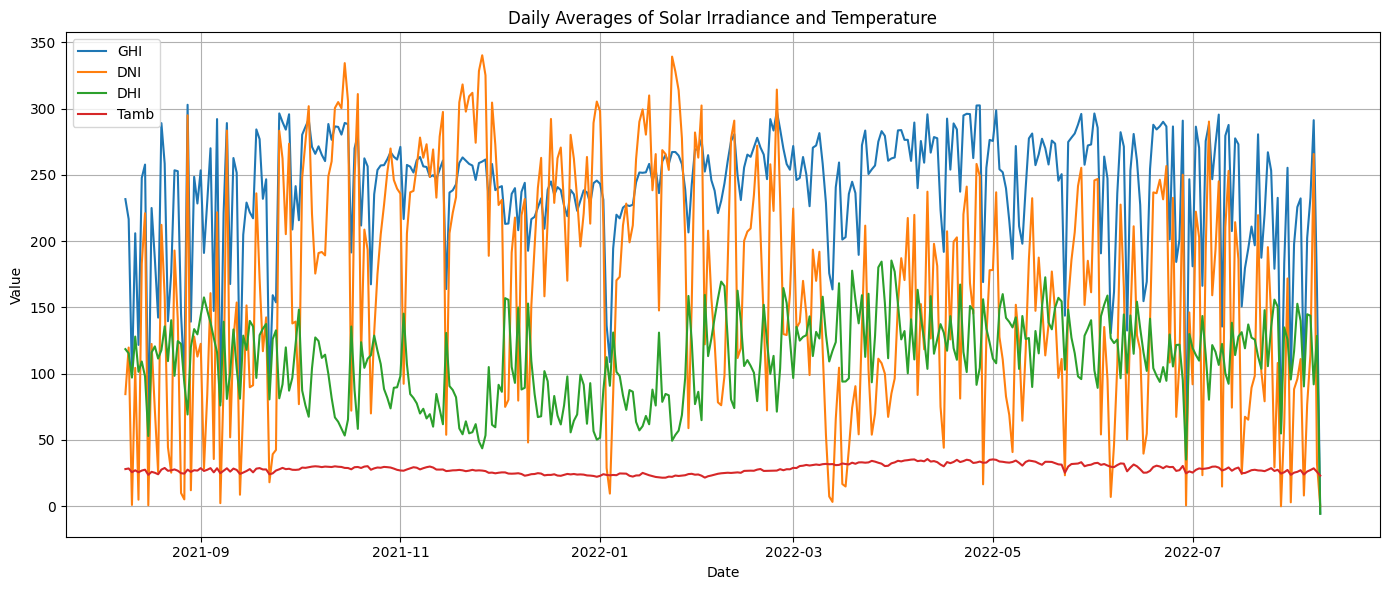

In [12]:
import matplotlib.pyplot as plt

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Sample down to daily average for easier plotting
df_daily = df.resample('D', on='Timestamp').mean()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df_daily.index, df_daily['GHI'], label='GHI')
plt.plot(df_daily.index, df_daily['DNI'], label='DNI')
plt.plot(df_daily.index, df_daily['DHI'], label='DHI')
plt.plot(df_daily.index, df_daily['Tamb'], label='Tamb')
plt.title('Daily Averages of Solar Irradiance and Temperature')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


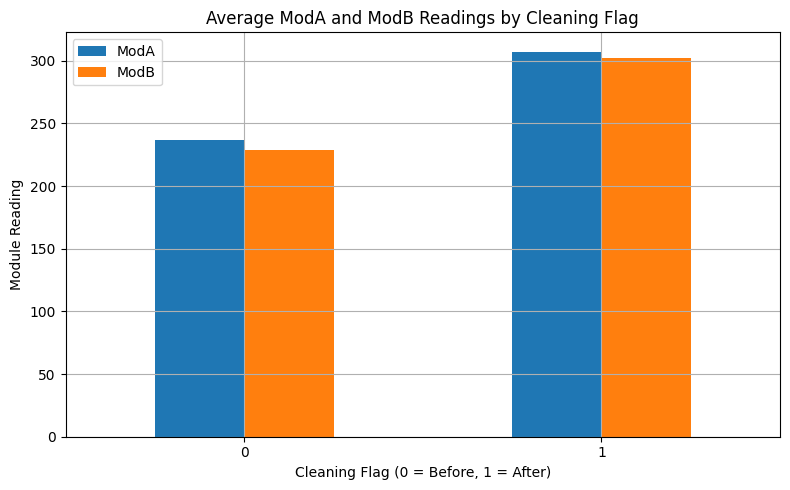

In [13]:
# Group by Cleaning flag and calculate average ModA and ModB
cleaning_effect = df.groupby('Cleaning')[['ModA', 'ModB']].mean()

# Plotting the comparison
cleaning_effect.plot(kind='bar', figsize=(8, 5))
plt.title('Average ModA and ModB Readings by Cleaning Flag')
plt.xlabel('Cleaning Flag (0 = Before, 1 = After)')
plt.ylabel('Module Reading')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


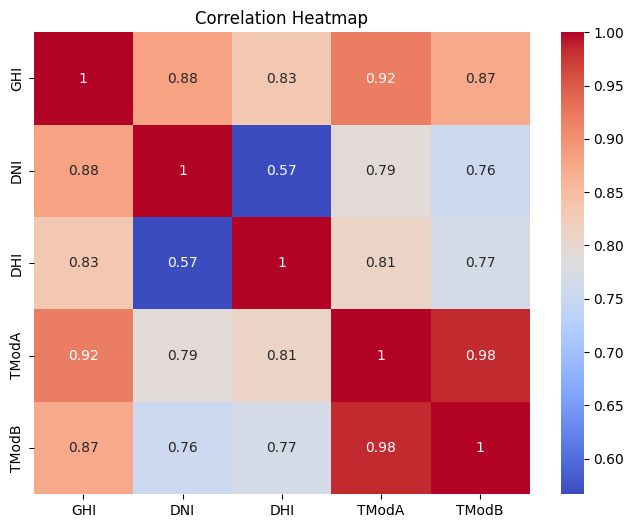

In [14]:
import seaborn as sns

# Select relevant columns
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
corr = df[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


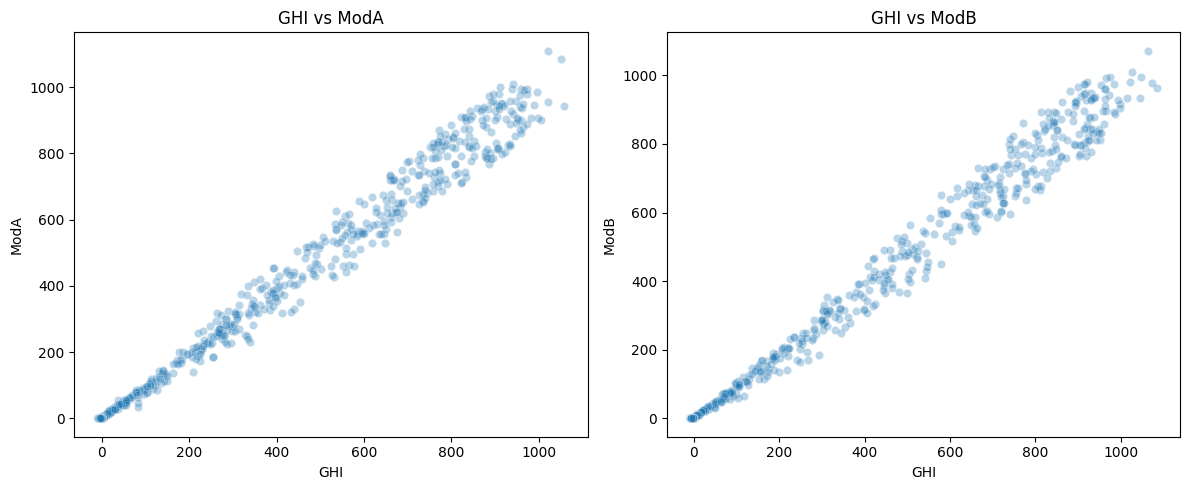

In [15]:
plt.figure(figsize=(12, 5))

# GHI vs ModA
plt.subplot(1, 2, 1)
sns.scatterplot(data=df.sample(1000), x='GHI', y='ModA', alpha=0.3)
plt.title('GHI vs ModA')
plt.xlabel('GHI')
plt.ylabel('ModA')

# GHI vs ModB
plt.subplot(1, 2, 2)
sns.scatterplot(data=df.sample(1000), x='GHI', y='ModB', alpha=0.3)
plt.title('GHI vs ModB')
plt.xlabel('GHI')
plt.ylabel('ModB')

plt.tight_layout()
plt.show()


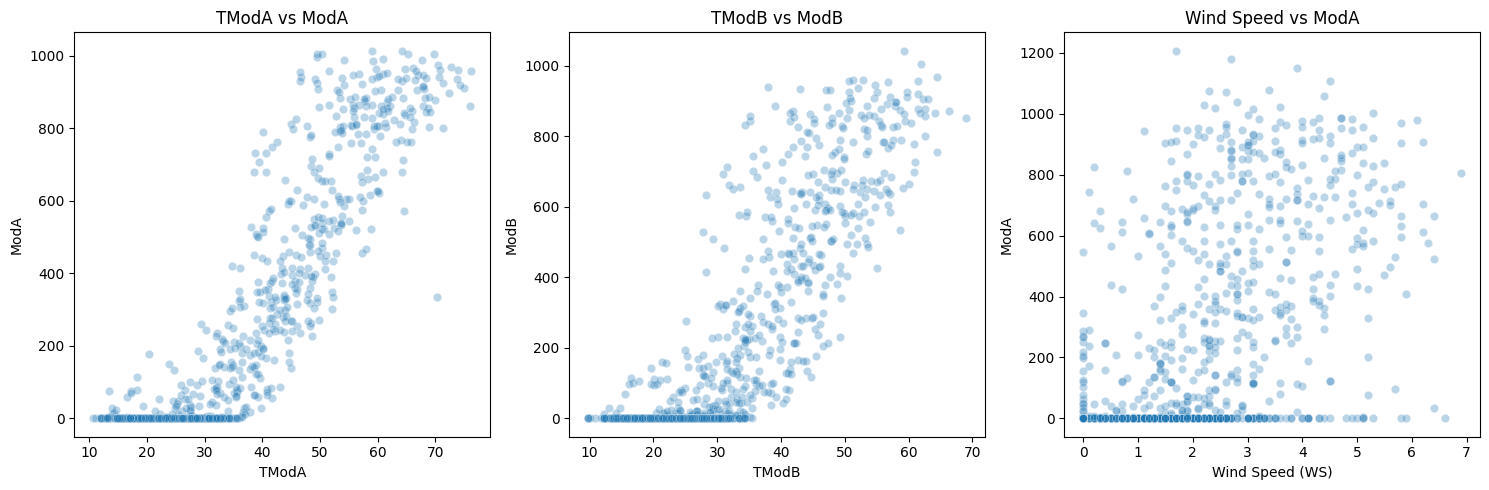

In [16]:
plt.figure(figsize=(15, 5))

# ModA vs TModA
plt.subplot(1, 3, 1)
sns.scatterplot(data=df.sample(1000), x='TModA', y='ModA', alpha=0.3)
plt.title('TModA vs ModA')
plt.xlabel('TModA')
plt.ylabel('ModA')

# ModB vs TModB
plt.subplot(1, 3, 2)
sns.scatterplot(data=df.sample(1000), x='TModB', y='ModB', alpha=0.3)
plt.title('TModB vs ModB')
plt.xlabel('TModB')
plt.ylabel('ModB')

# ModA vs Wind Speed
plt.subplot(1, 3, 3)
sns.scatterplot(data=df.sample(1000), x='WS', y='ModA', alpha=0.3)
plt.title('Wind Speed vs ModA')
plt.xlabel('Wind Speed (WS)')
plt.ylabel('ModA')

plt.tight_layout()
plt.show()


In [ ]:
Benin Key Insights Summary
- High solar potential indicated by strong and consistent GHI trends.
- Panel performance improves after cleaning, suggesting maintenance is crucial.
- Module readings (ModA/ModB) strongly correlate with irradiance.
- Moderate wind and temperature patterns indicate stable operating conditions.
